In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx')
df1=pd.read_excel(xls,'Existing employees')
df2=pd.read_excel(xls,'Employees who have left')

In [3]:
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


# Data analysis for existing employees:
using countplot to find relationships


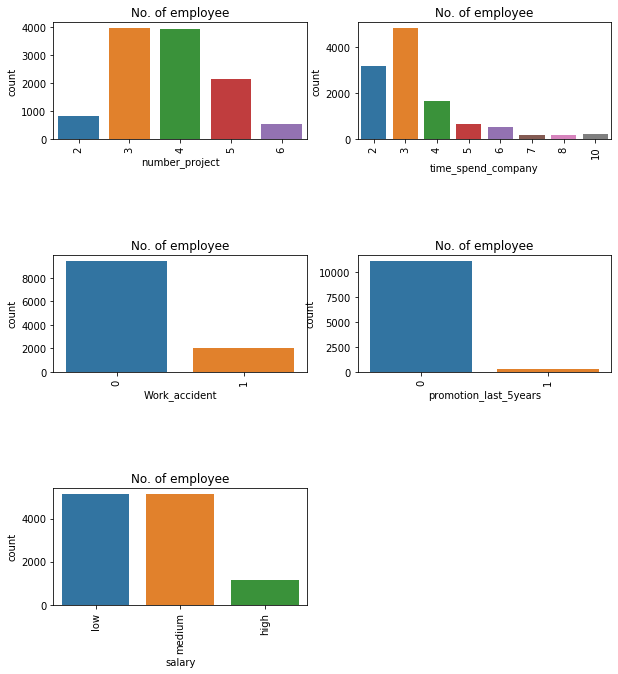

In [7]:
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i + 1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=df1)
    plt.xticks(rotation=90)
    plt.title("No. of employee")
plt.savefig("Output_file1.png")
plt.show()

# Combining data of employees who left and existing employees in order to study the churn pattern visually

In [8]:
df1['Churn']=0
df2['Churn']=1
frames=[df1,df2]

df=pd.concat(frames, axis=0, ignore_index=True)
df=df.sort_values(by='Emp ID', ascending=True)


In [9]:
df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Churn
11428,1,0.38,0.53,2,157,3,0,0,sales,low,1
11429,2,0.80,0.86,5,262,6,0,0,sales,medium,1
11430,3,0.11,0.88,7,272,4,0,0,sales,medium,1
11431,4,0.72,0.87,5,223,5,0,0,sales,low,1
11432,5,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,support,low,1
14995,14996,0.37,0.48,2,160,3,0,0,support,low,1
14996,14997,0.37,0.53,2,143,3,0,0,support,low,1
14997,14998,0.11,0.96,6,280,4,0,0,support,low,1


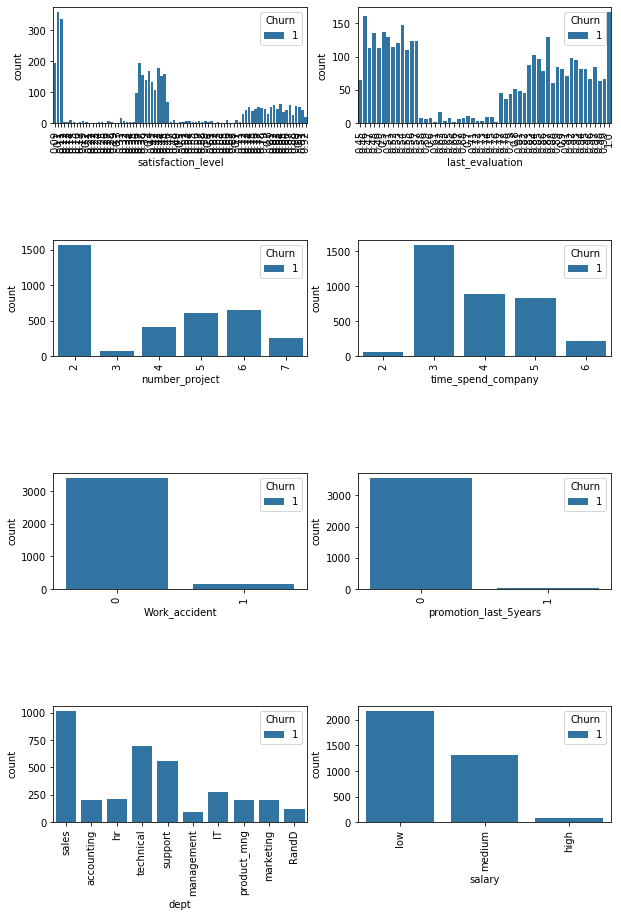

In [10]:
features=['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident', 'promotion_last_5years','dept','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i + 1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, hue='Churn', data=df2)
    plt.xticks(rotation=90)
    
plt.savefig("Output_file2.png")
plt.show()

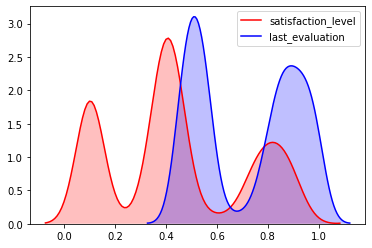

In [12]:
p1=sns.kdeplot(df2['satisfaction_level'], shade=True, color='r')
p1=sns.kdeplot(df2['last_evaluation'], shade=True, color='b')
plt.savefig('Output_file3.png')

# Analysis of visualisation results
An employee may churn under the following conditions:
1. He is overburdened with a lot of projects.
2. Time spent at the company exceeds 3 years.
3. No promotion in the past 5 years.
4. No salary increments.
5. Poor last_evaluation AND poor satisfaction_level. (If both hold true)

Points to be aware of:
1. Employees have churned even if there is good work safety conditions. ie. no work accidents. so that feature is redundant in determining employee churn.
2. Department wise churn- we cannot be sure that the employees in sales churn the highest. to make such conclusion we need to study the percentage change for each department. 

Redundant features: emp_id, Work_accident
Categorical feature: dept (needs to be encoded)


# Encoding categorical data

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [14]:
enc=LabelEncoder()

In [15]:
count=0
for i in df1.columns[0:]:
    if df1[i].dtype=='object':
        enc.fit(df1[i])
        df1[i]=enc.transform(df1[i])
        count+=1

In [16]:
count

2

In [17]:
enc1 = OneHotEncoder(handle_unknown='ignore')

In [18]:
enc_df1 = pd.DataFrame(enc1.fit_transform(df[['dept']]).toarray())
enc_df2 = pd.DataFrame(enc1.fit_transform(df[['salary']]).toarray())

In [19]:
enc_df1

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
enc_df1=enc_df1.drop([0], axis=1)

In [21]:
enc_df1.shape


(14999, 9)

In [22]:
enc_df2

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
14994,0.0,1.0,0.0
14995,0.0,1.0,0.0
14996,0.0,1.0,0.0
14997,0.0,1.0,0.0


In [23]:
enc_df2=enc_df2.drop([0], axis=1)

In [24]:
enc_df2.shape

(14999, 2)

In [25]:
df.shape

(14999, 11)

In [26]:
df=pd.concat([df,enc_df1,enc_df2], axis=1, join='outer')

In [27]:
df.shape

(14999, 22)

In [28]:
df.columns

Index([               'Emp ID',    'satisfaction_level',
             'last_evaluation',        'number_project',
        'average_montly_hours',    'time_spend_company',
               'Work_accident', 'promotion_last_5years',
                        'dept',                'salary',
                       'Churn',                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                             1,                       2],
      dtype='object')

In [29]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,...,2,3,4,5,6,7,8,9,1,2
0,2001,0.58,0.74,4,215,3,0,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
df.shape

(14999, 22)

In [31]:
X=df.iloc[:, 0:]
y=df.iloc[:,10]
X.drop(['Emp ID', 'Work_accident', 'salary', 'dept', 'Churn'], axis=1, inplace=True)
#X['salary'].map()({'low':0, 'medium':1, 'high':2})

In [32]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,1,2,3,4,5,6,7,8,9,1,2
0,0.58,0.74,4,215,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.82,0.67,2,202,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.45,0.69,5,193,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.78,0.82,5,247,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.49,0.60,3,214,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
X.shape

(14999, 17)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [36]:
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((11999, 17), (3000, 17), (11999,), (3000,))

In [37]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

In [38]:
clf_tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [39]:
y_pred=clf_tree.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test, y_pred)

0.946

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,17)}

tree_grid = GridSearchCV(clf_tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_

In [45]:
tree_grid.best_params_

{'max_depth': 9, 'max_features': 11}

In [46]:
tree_grid.best_score_

0.9787482284285118

In [47]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.9826666666666667

### Thus, the proposed model "DECISION TREE ALGORITHM" can predict the employee churn with an accuracy of 98.3%